In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# PDの日本語フォントをサポート
# plt.rcParams['font.family'] = 'Gothic'

# Macの日本語フォントをサポート
plt.rcParams['font.family'] = 'Hiragino Sans'

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## Examples

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。

### **チャレンジ１**
#### 国の災害タイプごとの死亡者数を可視化

In [10]:
def visualize_deaths_by_disaster_type(df, country, top_n=None, use_plotly=False):
    sub = df[df['Country'] == country].copy()
    if sub.empty:
        print(f"データが見つかりません: {country}")
        return
    sub['Total Deaths'] = pd.to_numeric(sub['Total Deaths'], errors='coerce').fillna(0)
    grouped = sub.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
    if top_n is not None:
        grouped = grouped.head(top_n)
    labels = grouped.index.tolist()
    values = grouped.values
    if use_plotly:
        fig = px.bar(x=labels, y=values, labels={'x':'Disaster Type','y':'Total Deaths'},
                     title=f"{country} - Deaths by Disaster Type")
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()
    else:
        plt.figure(figsize=(10,6))
        plt.bar(labels, values)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Total Deaths')
        plt.title(f"{country} - Deaths by Disaster Type")
        plt.tight_layout()
        plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

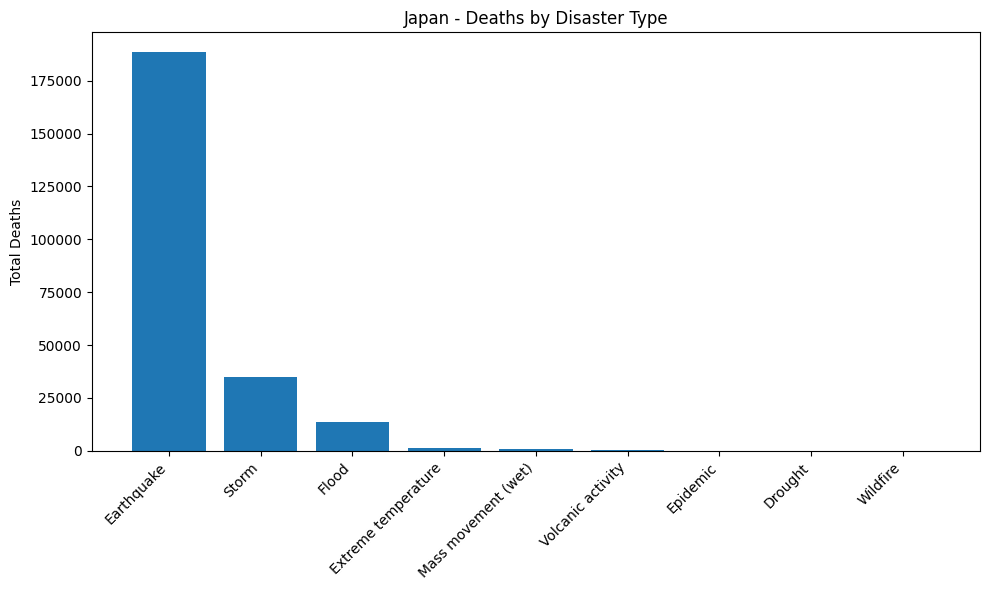

In [11]:
visualize_deaths_by_disaster_type(emdat, 'Japan', top_n=20000, use_plotly=False)

### **チャレンジ２**
二つの国の災害ごとの死亡者数の可視化

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_disaster_deaths(data: pd.DataFrame, country1: str, country2: str):
    subset = data[data["Country"].isin([country1, country2])]
    
    if subset.empty:
        print("指定した国のデータが見つかりませんでした。")
        return
    deaths_by_type = subset.groupby(["Disaster Type", "Country"])["Total Deaths"].sum().unstack(fill_value=0)
    
    deaths_by_type.plot(kind="bar", figsize=(12, 6))
    plt.title(f"{country1} と {country2} の災害タイプ別死亡者数比較", fontsize=14)
    plt.xlabel("災害タイプ", fontsize=12)
    plt.ylabel("死亡者数", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="国")
    plt.tight_layout()
    plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2850998015.py:18: UserWarning: Glyph 28797 (\N{CJK UNIFIED IDEOGRAPH-707D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2850998015.py:18: UserWarning: Glyph 23475 (\N{CJK UNIFIED IDEOGRAPH-5BB3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\

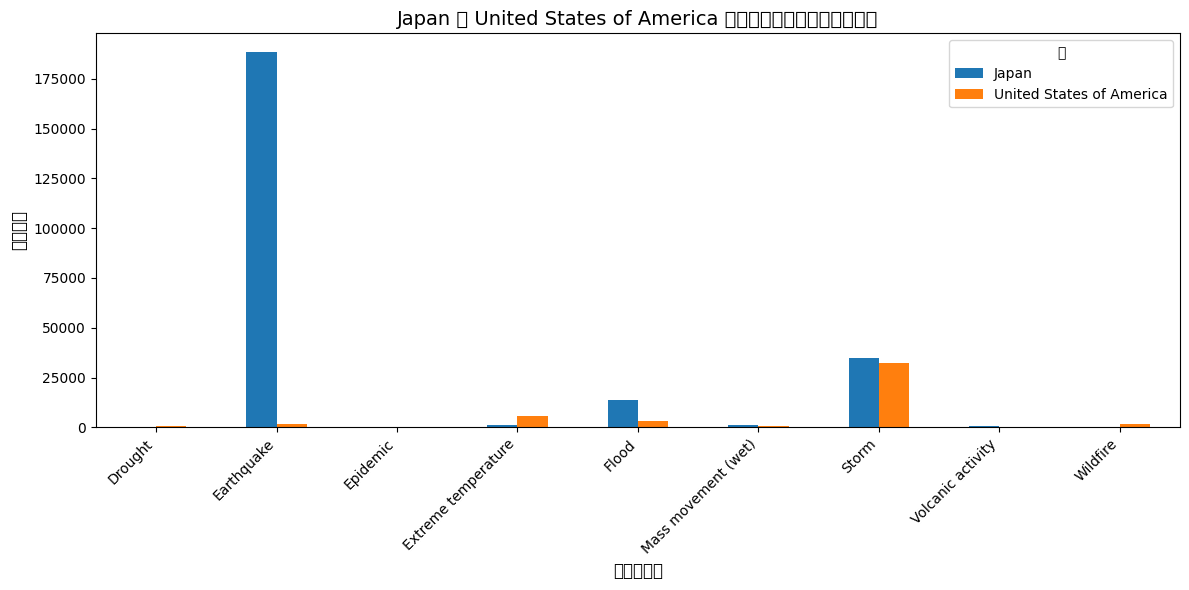

In [13]:
data = pd.read_csv("emdat.csv")

compare_disaster_deaths(data, "Japan", "United States of America")

### **チャレンジ３**
死亡者数が多い順に、最も致命的な災害を上位５つを可視化

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_deadly_disasters(data: pd.DataFrame, country: str, top_n: int = 5):
    country_data = data[data["Country"] == country]
    
    if country_data.empty:
        print(f"{country} のデータが見つかりませんでした。")
        return
    
    deaths_by_type = country_data.groupby("Disaster Type")["Total Deaths"].sum()
    
    top_disasters = deaths_by_type.sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    top_disasters.plot(kind="bar", color="firebrick", edgecolor="black")
    plt.title(f"{country} の致命的な災害タイプ Top {top_n}", fontsize=14)
    plt.xlabel("災害タイプ", fontsize=12)
    plt.ylabel("死亡者数", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2741965881.py:21: UserWarning: Glyph 28797 (\N{CJK UNIFIED IDEOGRAPH-707D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2741965881.py:21: UserWarning: Glyph 23475 (\N{CJK UNIFIED IDEOGRAPH-5BB3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2741965881.py:21: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\2741965881.py:21: UserW

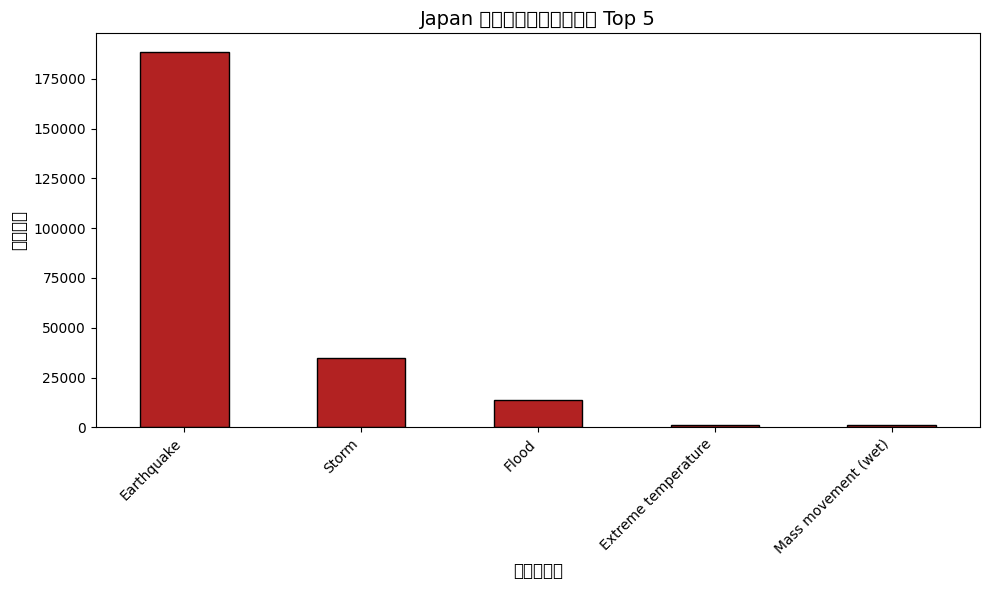

In [15]:
data = pd.read_csv("emdat.csv")

plot_top_deadly_disasters(data, "Japan", top_n=5)

### **チャレンジ４**
2000年から2010年の死亡者数を可視化

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_deaths_2000_2010(data: pd.DataFrame, country: str = None):
    subset = data[(data["Start Year"] >= 2000) & (data["Start Year"] <= 2010)]
    
    if country:
        subset = subset[subset["Country"] == country]
        if subset.empty:
            print(f"{country} の2000〜2010年のデータが見つかりませんでした。")
            return
    
    deaths_by_year = subset.groupby("Start Year")["Total Deaths"].sum()
    
    plt.figure(figsize=(10, 6))
    deaths_by_year.plot(kind="line", marker="o", color="darkred")
    title = f"{country} の2000〜2010年死亡者数推移" if country else "世界の2000〜2010年死亡者数推移"
    plt.title(title, fontsize=14)
    plt.xlabel("年", fontsize=12)
    plt.ylabel("死亡者数", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.


findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\1187569940.py:22: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\1187569940.py:22: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\1187569940.py:22: UserWarning: Glyph 20129 (\N{CJ

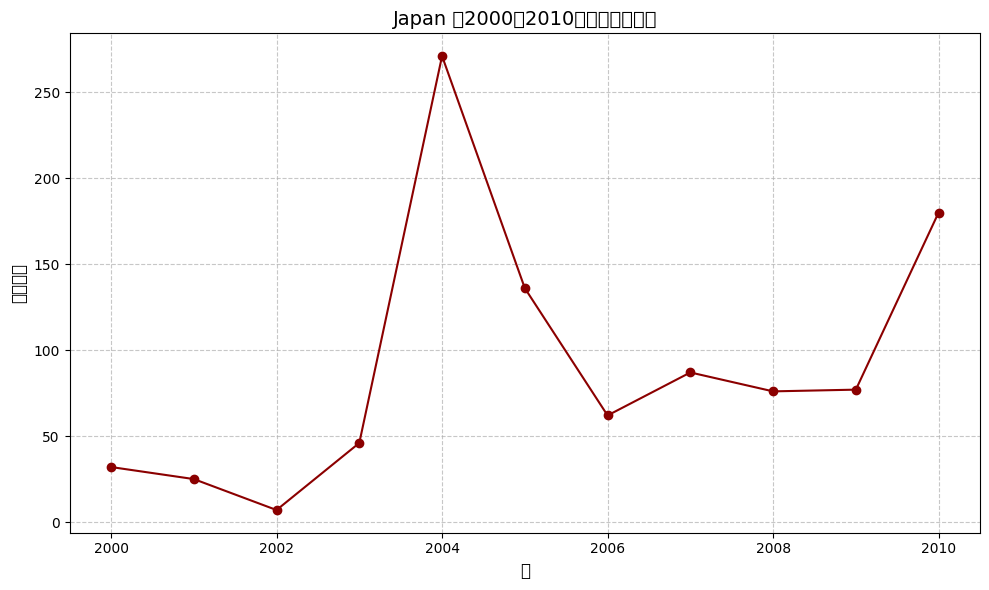

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\ipykernel_23048\1187569940.py:22: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
C:\Users\barii\AppData\Local\Temp\i

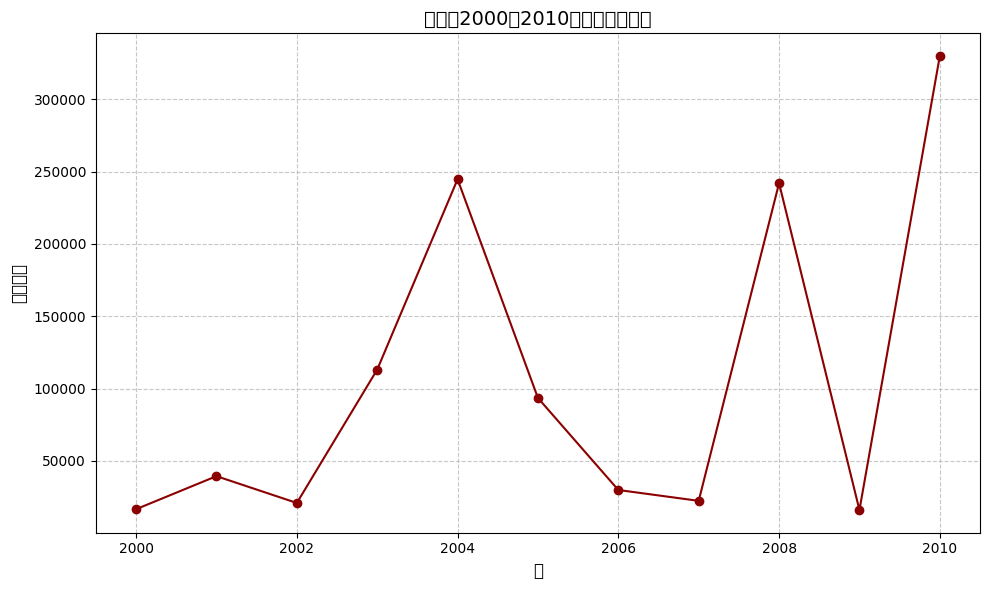

In [17]:
data = pd.read_csv("emdat.csv")

plot_deaths_2000_2010(data, "Japan")

plot_deaths_2000_2010(data)

### **チャレンジ５**
 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。

In [26]:
def visualize_country_disaster_combination(df, countries, disaster_types, death_threshold=1000):
    """
    国と災害タイプを組み合わせた可視化関数
    複数の国と災害タイプの組み合わせを並べたグラフを表示
    
    Parameters:
    - df: データフレーム
    - countries: リスト（複数の国名）
    - disaster_types: リスト（複数の災害タイプ）
    - death_threshold: 強調表示の閾値
    """
    df = df.copy()
    df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)
    
    # サブプロットの設定
    num_plots = len(countries) * len(disaster_types)
    cols = min(3, num_plots)  # 最大3列
    rows = (num_plots + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten() if num_plots > 1 else [axes]
    
    plot_idx = 0
    
    # 各国と災害タイプの組み合わせごとに処理
    for country in countries:
        for disaster_type in disaster_types:
            # フィルタリング
            subset = df[(df['Country'] == country) & (df['Disaster Type'] == disaster_type)]
            
            if subset.empty:
                axes[plot_idx].text(0.5, 0.5, f'No data\n{country}\n{disaster_type}',
                                   ha='center', va='center', transform=axes[plot_idx].transAxes,
                                   fontsize=10)
                axes[plot_idx].set_title(f'{country} - {disaster_type}', fontweight='bold')
                plot_idx += 1
                continue
            
            # 年ごとに死亡者数を集計
            yearly = subset.groupby('Start Year')['Total Deaths'].sum().sort_index()
            
            # 色分け（閾値以上かどうか）
            colors = ['#d62728' if v >= death_threshold else '#1f77b4' for v in yearly.values]
            
            # グラフ描画
            axes[plot_idx].bar(yearly.index, yearly.values, color=colors, edgecolor='black', linewidth=0.5)
            axes[plot_idx].set_title(f'{country} - {disaster_type}', fontweight='bold', fontsize=11)
            axes[plot_idx].set_xlabel('Year', fontsize=9)
            axes[plot_idx].set_ylabel('Deaths', fontsize=9)
            axes[plot_idx].tick_params(axis='x', rotation=45, labelsize=8)
            axes[plot_idx].tick_params(axis='y', labelsize=8)
            axes[plot_idx].grid(axis='y', alpha=0.3)
            
            plot_idx += 1
    
    # 余った枠を非表示
    for i in range(plot_idx, len(axes)):
        axes[i].axis('off')
    
    # 凡例を追加
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#1f77b4', label=f'< {death_threshold}'),
                      Patch(facecolor='#d62728', label=f'>= {death_threshold}')]
    fig.legend(handles=legend_elements, loc='upper center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, 0.98))
    
    plt.suptitle('死亡者数の年別推移（国と災害タイプの組み合わせ）', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

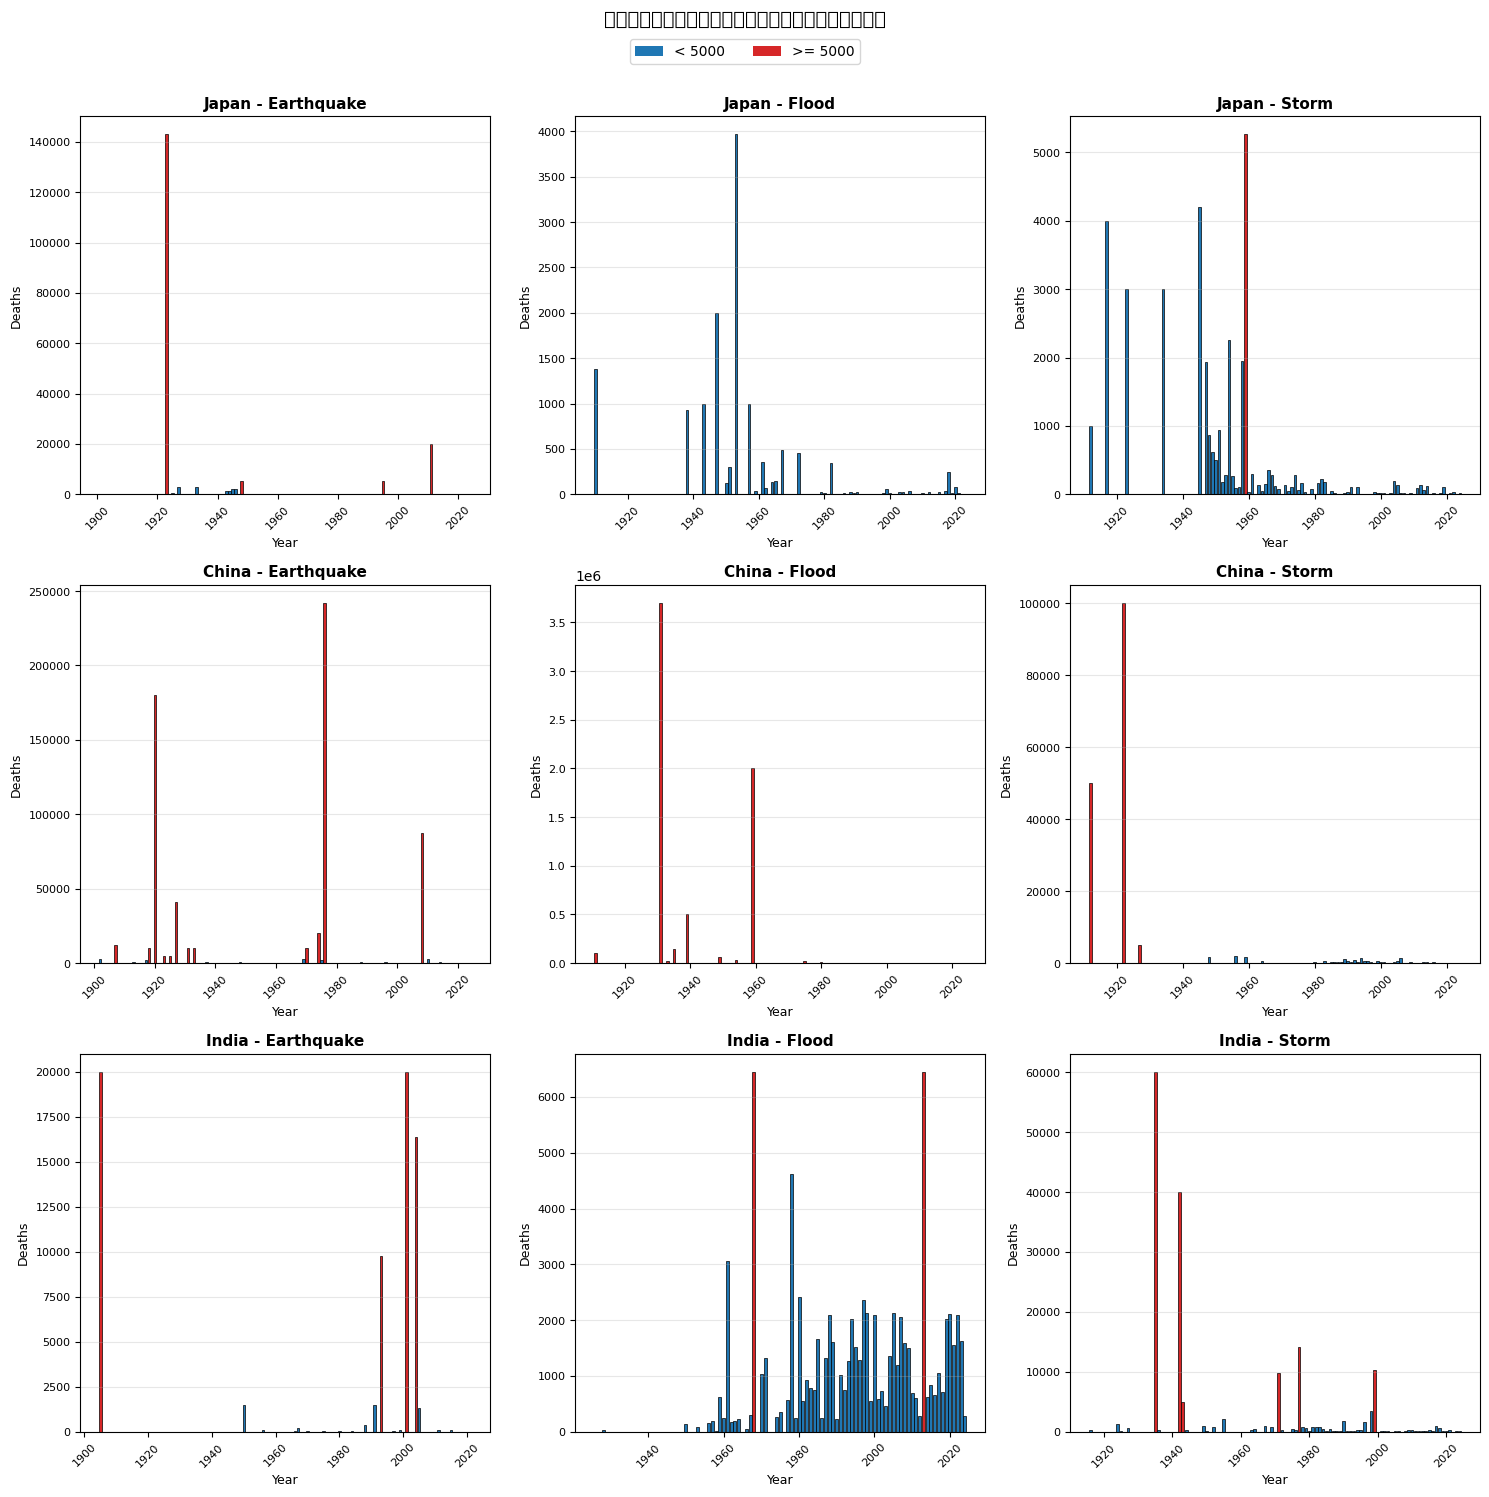

In [27]:
# 使用例1: 複数国と複数災害タイプの組み合わせ
visualize_country_disaster_combination(
    emdat,
    countries=['Japan', 'China', 'India'],
    disaster_types=['Earthquake', 'Flood', 'Storm'],
    death_threshold=5000
)

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

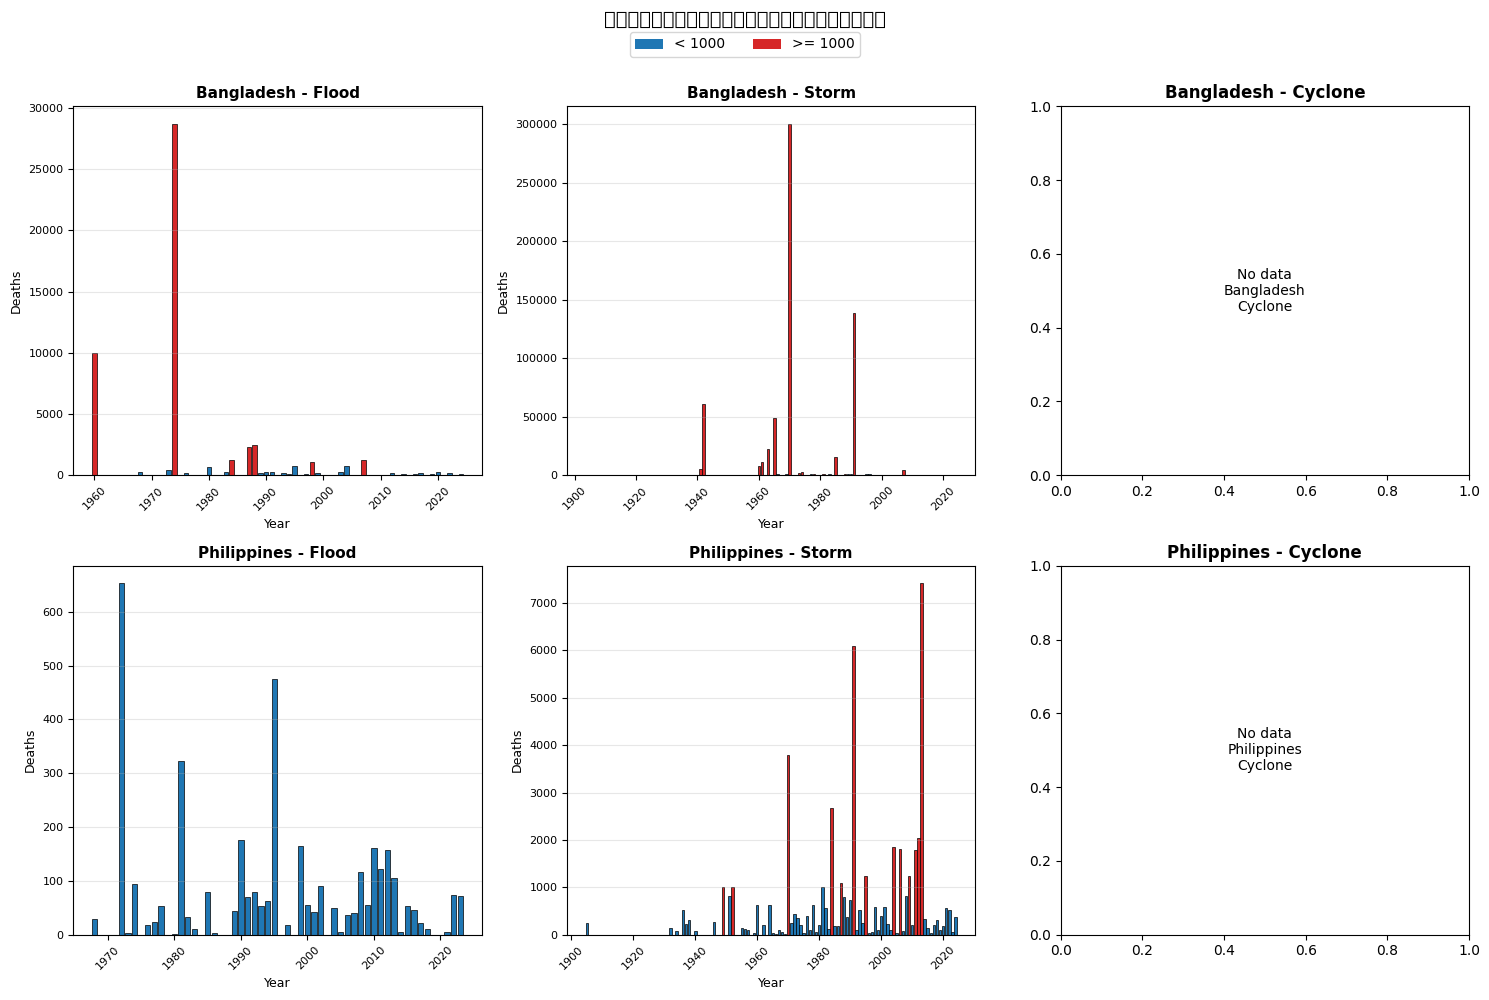

In [28]:
# 使用例2: 特定国と特定災害タイプの詳細比較
visualize_country_disaster_combination(
    emdat,
    countries=['Bangladesh', 'Philippines'],
    disaster_types=['Flood', 'Storm', 'Cyclone'],
    death_threshold=1000
)

In [29]:
# ボーナス関数: 国と災害タイプの組み合わせで死亡者数合計をヒートマップ表示
def visualize_heatmap_country_disaster(df, countries=None, disaster_types=None):
    """
    国と災害タイプの組み合わせを行列化してヒートマップで表示
    """
    df = df.copy()
    df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce').fillna(0)
    
    # デフォルト：死亡者が多い国と災害タイプを自動抽出
    if countries is None:
        top_countries = df.groupby('Country')['Total Deaths'].sum().nlargest(8).index.tolist()
        countries = top_countries
    
    if disaster_types is None:
        top_disasters = df.groupby('Disaster Type')['Total Deaths'].sum().nlargest(8).index.tolist()
        disaster_types = top_disasters
    
    # クロスタビュレーション
    crosstab = pd.crosstab(
        df[df['Country'].isin(countries)]['Country'],
        df[df['Disaster Type'].isin(disaster_types)]['Disaster Type'],
        values=df[df['Country'].isin(countries)]['Total Deaths'],
        aggfunc='sum'
    )
    crosstab = crosstab.fillna(0)
    
    # ヒートマップ表示
    plt.figure(figsize=(12, 8))
    import seaborn as sns
    sns.heatmap(crosstab, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Total Deaths'},
                linewidths=0.5, linecolor='gray')
    plt.title('国と災害タイプ別 死亡者数ヒートマップ', fontsize=14, fontweight='bold')
    plt.xlabel('Disaster Type', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

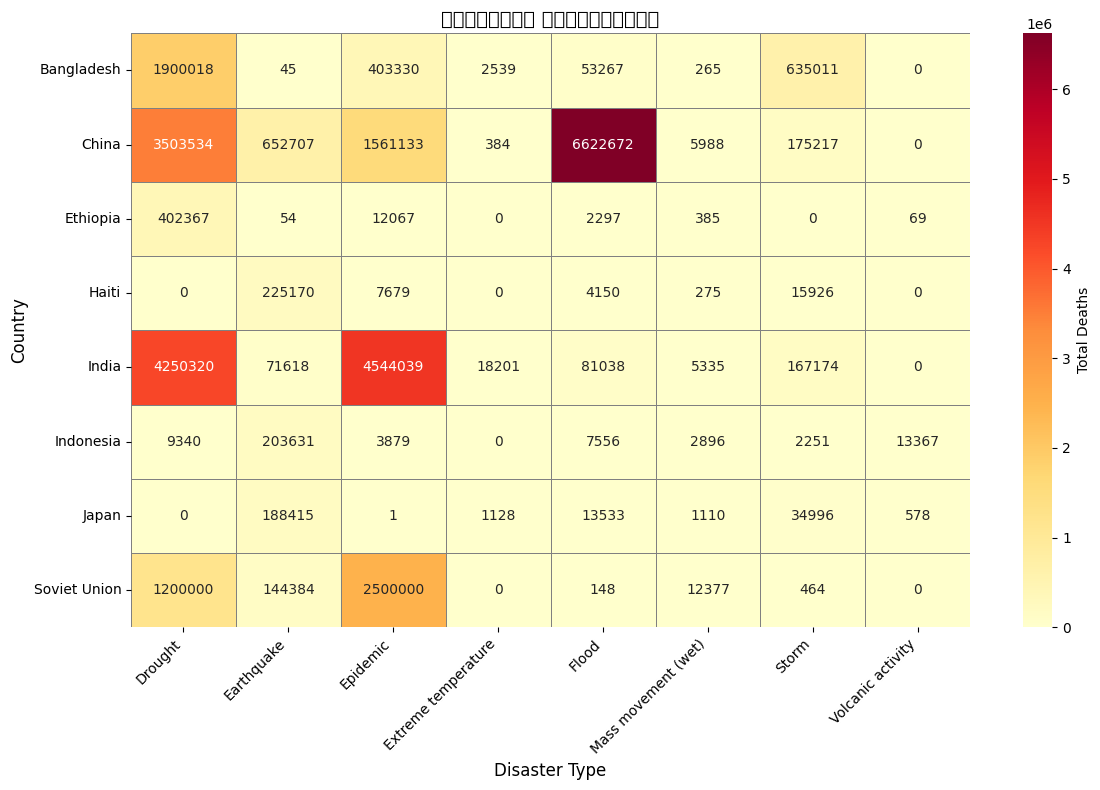

In [32]:
# ヒートマップの表示例
visualize_heatmap_country_disaster(emdat)